In [1]:
%load_ext nb_black
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns

%matplotlib inline

<IPython.core.display.Javascript object>

### Load the houseprices data from Thinkful's database.

In [2]:
postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "houseprices"
table_name = "houseprices"

db_url = f"postgresql://{postgres_user}:{postgres_pw}@{postgres_host}:{postgres_port}/{postgres_db}"

engine = create_engine(db_url)

prices_df = pd.read_sql_query(f"SELECT * FROM {table_name};", con=engine)

# close the db connetion
engine.dispose()

<IPython.core.display.Javascript object>

### Reimplement the model you built in the previous checkpoint.

In [3]:
prices_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


<IPython.core.display.Javascript object>

In [4]:
prices_df2 = prices_df.copy()
cols_to_drop = [
    "lotfrontage",
    "fireplacequ",
    "fence",
    "alley",
    "miscfeature",
    "poolqc",
    "id",
]
prices_df2.drop(columns=cols_to_drop, inplace=True)
print(
    (prices_df2.isnull().sum() / prices_df2.isnull().count())
    .sort_values(ascending=False)
    .head(14)
)
prices_df2.head()

garagetype      0.055479
garageyrblt     0.055479
garagefinish    0.055479
garagequal      0.055479
garagecond      0.055479
bsmtfintype2    0.026027
bsmtexposure    0.026027
bsmtfintype1    0.025342
bsmtcond        0.025342
bsmtqual        0.025342
masvnrtype      0.005479
masvnrarea      0.005479
electrical      0.000685
yearremodadd    0.000000
dtype: float64


,mssubclass,mszoning,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,...,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


<IPython.core.display.Javascript object>

In [5]:
cols_with_nulls = (
    (prices_df2.isnull().sum() / prices_df2.isnull().count())
    .sort_values(ascending=False)
    .head(13)
    .index
)
cols_with_nulls

Index(['garagetype', 'garageyrblt', 'garagefinish', 'garagequal', 'garagecond',
       'bsmtfintype2', 'bsmtexposure', 'bsmtfintype1', 'bsmtcond', 'bsmtqual',
       'masvnrtype', 'masvnrarea', 'electrical'],
      dtype='object')

<IPython.core.display.Javascript object>

In [6]:
prices_df2.dropna(inplace=True)
(prices_df2.isnull().sum() / prices_df2.isnull().count()).sort_values(
    ascending=False
).head(12)

saleprice       0.0
roofstyle       0.0
exterior1st     0.0
exterior2nd     0.0
masvnrtype      0.0
masvnrarea      0.0
exterqual       0.0
extercond       0.0
foundation      0.0
bsmtqual        0.0
bsmtcond        0.0
bsmtexposure    0.0
dtype: float64

<IPython.core.display.Javascript object>

In [7]:
corr_data = prices_df2.corrwith(prices_df2["saleprice"]).sort_values(ascending=False)
corr_data.iloc[np.where(abs(corr_data.values) >= 0.1)]
feature_cols = corr_data.iloc[np.where(abs(corr_data.values) >= 0.1)].index
feature_cols

Index(['saleprice', 'overallqual', 'grlivarea', 'garagecars', 'garagearea',
       'firstflrsf', 'totalbsmtsf', 'fullbath', 'totrmsabvgrd', 'yearbuilt',
       'yearremodadd', 'garageyrblt', 'masvnrarea', 'fireplaces', 'bsmtfinsf1',
       'openporchsf', 'secondflrsf', 'wooddecksf', 'halfbath', 'lotarea',
       'bsmtfullbath', 'bsmtunfsf', 'bedroomabvgr', 'overallcond',
       'kitchenabvgr', 'enclosedporch'],
      dtype='object')

<IPython.core.display.Javascript object>

In [8]:
y = prices_df2["saleprice"]
X = prices_df2[feature_cols]
X = X.drop("saleprice", axis=1)

<IPython.core.display.Javascript object>

In [9]:
from sklearn.linear_model import LinearRegression

line = LinearRegression()
line.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<IPython.core.display.Javascript object>

### Check for all of the assumptions

### Assumption one: linearity of the model in its coefficients

In [10]:
X_pred = line.predict(X)

<IPython.core.display.Javascript object>

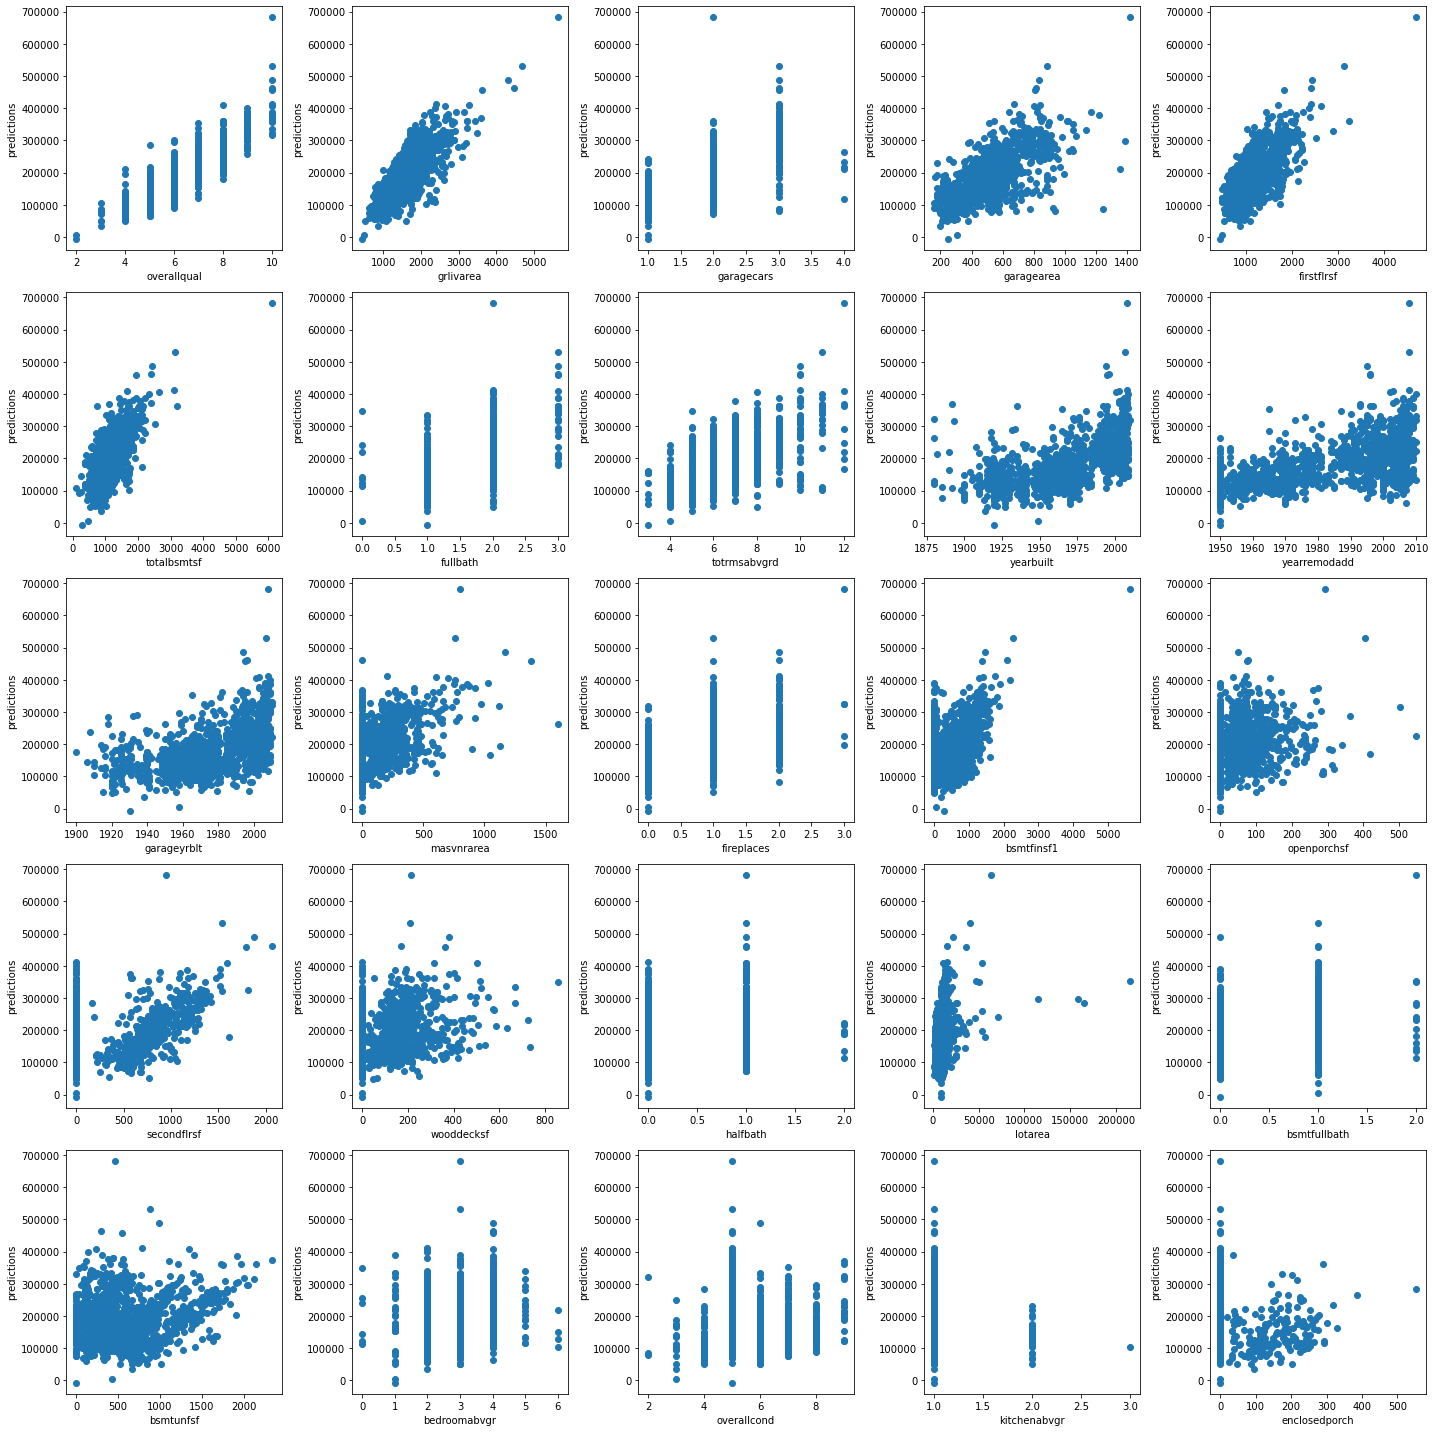

<IPython.core.display.Javascript object>

In [11]:
plot_number = 1
plt.figure(figsize=[20, 20])
for col in X.columns:
    plt.subplot(5, 5, plot_number)
    plot_number += 1
    plt.scatter(X[col], X_pred)
    plt.xlabel(col)
    plt.ylabel("predictions")
plt.tight_layout()

### Assumption two: the error term should be zero on average

In [12]:
errors = y - X_pred
np.mean(errors)

-3.244489798898654e-10

<IPython.core.display.Javascript object>

### Assumption three: homoscedasticity

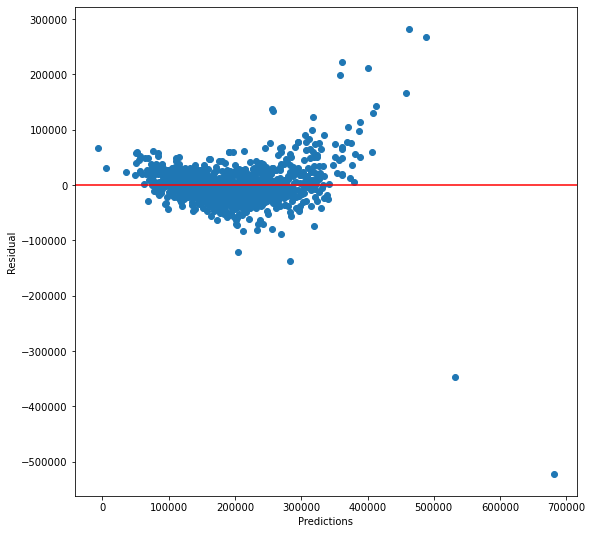

<IPython.core.display.Javascript object>

In [13]:
plt.figure(figsize=[9, 9])
plt.scatter(X_pred, errors)
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.axhline(0, color="r")

### Assumption four: low multicollinearity

In [14]:
cols = list(X.columns)
cols.append("saleprice")
prices_df2[cols].corr()

,overallqual,grlivarea,garagecars,garagearea,firstflrsf,totalbsmtsf,fullbath,totrmsabvgrd,yearbuilt,yearremodadd,...,wooddecksf,halfbath,lotarea,bsmtfullbath,bsmtunfsf,bedroomabvgr,overallcond,kitchenabvgr,enclosedporch,saleprice
overallqual,1.000000,0.594470,0.591878,0.530092,0.481978,0.505897,0.580425,0.442941,0.570668,0.549460,...,0.218570,0.249283,0.090451,0.083254,0.292940,0.081994,-0.163080,-0.135084,-0.116931,0.783546
grlivarea,0.594470,1.000000,0.483943,0.477868,0.554846,0.460778,0.625953,0.823491,0.189146,0.276580,...,0.241277,0.415221,0.255445,0.028857,0.222438,0.510088,-0.093843,0.100521,0.012779,0.711706
garagecars,0.591878,0.483943,1.000000,0.832166,0.440237,0.453427,0.512502,0.404416,0.524076,0.459449,...,0.208674,0.197136,0.138228,0.131403,0.242278,0.119537,-0.249832,0.048208,-0.147945,0.640154
garagearea,0.530092,0.477868,0.832166,1.000000,0.500071,0.511475,0.424693,0.368435,0.443854,0.386213,...,0.204033,0.126283,0.168630,0.186558,0.195401,0.089036,-0.204905,0.035487,-0.111119,0.607535
firstflrsf,0.481978,0.554846,0.440237,0.500071,1.000000,0.893110,0.367498,0.393786,0.263585,0.241889,...,0.233200,-0.146494,0.288502,0.251597,0.318097,0.100643,-0.144066,0.059242,-0.056003,0.604714
totalbsmtsf,0.505897,0.460778,0.453427,0.511475,0.893110,1.000000,0.345685,0.297609,0.385146,0.264281,...,0.214364,-0.124788,0.267188,0.282031,0.363767,0.029989,-0.228020,0.036844,-0.104484,0.602042
fullbath,0.580425,0.625953,0.512502,0.424693,0.367498,0.345685,1.000000,0.547592,0.486777,0.460120,...,0.189532,0.134953,0.115727,-0.084267,0.305802,0.355542,-0.211882,0.078037,-0.130885,0.569313
totrmsabvgrd,0.442941,0.823491,0.404416,0.368435,0.393786,0.297609,0.547592,1.000000,0.099415,0.174660,...,0.166052,0.357991,0.185654,-0.052065,0.242020,0.658923,-0.063883,0.234984,-0.003321,0.551821
yearbuilt,0.570668,0.189146,0.524076,0.443854,0.263585,0.385146,0.486777,0.099415,1.000000,0.617156,...,0.212296,0.227626,-0.005022,0.175108,0.147762,-0.080644,-0.417330,-0.176124,-0.385415,0.504297
yearremodadd,0.549460,0.276580,0.459449,0.386213,0.241889,0.264281,0.460120,0.174660,0.617156,1.000000,...,0.201057,0.169456,0.001681,0.099294,0.171881,-0.074393,0.035076,-0.154147,-0.218452,0.501435


<IPython.core.display.Javascript object>

### Assumption five: error terms should be uncorrelated with one another

/Users/abilenky/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


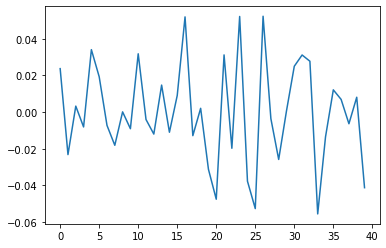

<IPython.core.display.Javascript object>

In [15]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)
plt.plot(acf_data[1:])

### Assumption six: features shouldn't be correlated with the errors

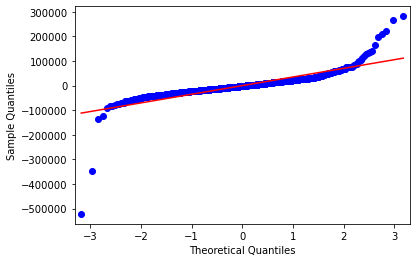

(array([1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 6.000e+01,
        1.198e+03, 6.500e+01, 7.000e+00, 4.000e+00]),
 array([-521746.51180684, -441353.02554642, -360959.539286  ,
        -280566.05302559, -200172.56676517, -119779.08050475,
         -39385.59424433,   41007.89201609,  121401.37827651,
         201794.86453692,  282188.35079734]),
 <BarContainer object of 10 artists>)

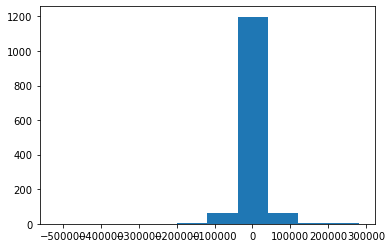

<IPython.core.display.Javascript object>

In [16]:
import statsmodels.api as sm

sm.qqplot(errors, line="s")
plt.show()
plt.hist(errors)